C:\Users\geeth\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



🔹 Logistic Regression Performance:
   ✅ Accuracy: 0.9455
   ✅ Precision: 0.9473
   ✅ Recall: 0.9455
   ✅ F1-Score: 0.9454

🔹 KNN Performance:
   ✅ Accuracy: 0.9682
   ✅ Precision: 0.9713
   ✅ Recall: 0.9682
   ✅ F1-Score: 0.9676

🔹 Random Forest Performance:
   ✅ Accuracy: 0.9886
   ✅ Precision: 0.9893
   ✅ Recall: 0.9886
   ✅ F1-Score: 0.9886

🏆 Best Model: Random Forest with Accuracy: 0.9886


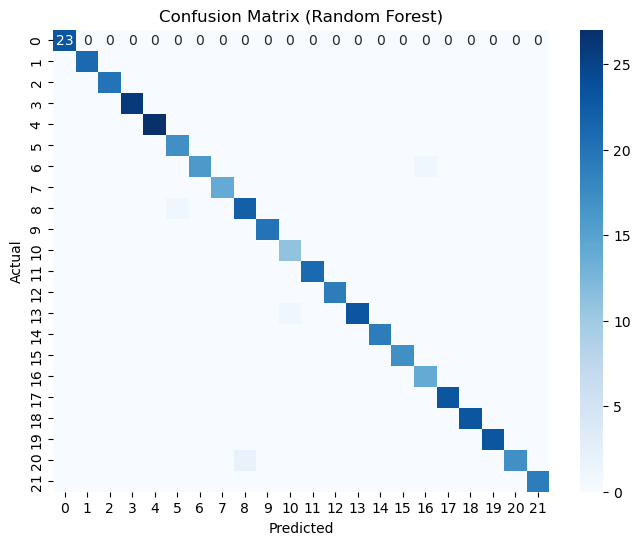


📊 Model Performance Comparison:
                     Accuracy  Precision    Recall  F1-Score
Logistic Regression  0.945455   0.947263  0.945455  0.945432
KNN                  0.968182   0.971340  0.968182  0.967569
Random Forest        0.988636   0.989293  0.988636  0.988645


In [56]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

# Ensure the models directory exists
models_dir = "models"
os.makedirs(models_dir, exist_ok=True)

# Load dataset
df = pd.read_csv("Crop_recommendation.csv")

# Rename "label" to "crop"
df.rename(columns={"label": "crop"}, inplace=True)

# Handle missing values (Fill NaN values with column mean)
df.fillna(df.mean(numeric_only=True), inplace=True)

# Encode categorical column (Crop Type)
label_encoder = LabelEncoder()
df["crop"] = label_encoder.fit_transform(df["crop"])
joblib.dump(label_encoder, f"{models_dir}/labelencoder.pkl")

# Split features and labels
X = df.drop(columns=["crop"])
y = df["crop"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

best_model = None
best_accuracy = 0
best_model_name = ""
model_results = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=1)
    rec = recall_score(y_test, y_pred, average='weighted', zero_division=1)
    f1 = f1_score(y_test, y_pred, average='weighted')

    model_results[name] = {"Accuracy": acc, "Precision": prec, "Recall": rec, "F1-Score": f1}

    print(f"\n🔹 {name} Performance:")
    print(f"   ✅ Accuracy: {acc:.4f}")
    print(f"   ✅ Precision: {prec:.4f}")
    print(f"   ✅ Recall: {rec:.4f}")
    print(f"   ✅ F1-Score: {f1:.4f}")

    if acc > best_accuracy:
        best_accuracy = acc
        best_model = model
        best_model_name = name

# Save the best model
joblib.dump(best_model, f"{models_dir}/best_crop_recommendation.pkl")
print(f"\n🏆 Best Model: {best_model_name} with Accuracy: {best_accuracy:.4f}")

# Confusion Matrix
y_pred_best = best_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred_best)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix ({best_model_name})')
plt.show()

# Print model comparison table
print("\n📊 Model Performance Comparison:")
comparison_df = pd.DataFrame(model_results).T
print(comparison_df)


In [52]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# Ensure the models directory exists
models_dir = "models"
os.makedirs(models_dir, exist_ok=True)

# Load dataset
df = pd.read_csv("Crop_yield.csv")

# Rename column if needed
df.rename(columns={"Yield": "yield"}, inplace=True)

# Handle missing values
df.fillna(df.mean(numeric_only=True), inplace=True)

# Identify categorical columns
categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()
print("Categorical Columns Found:", categorical_cols)

# Encode categorical columns
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

# Save label encoders
joblib.dump(label_encoders, f"{models_dir}/label_encoders.pkl")

# Split features and labels
X = df.drop(columns=["yield"])
y = df["yield"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

best_model = None
best_rmse = float('inf')  # Lower RMSE is better
best_model_name = ""

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    print(f"🔹 {name} Performance:")
    print(f"   ✅ RMSE: {rmse:.4f}")
    print(f"   ✅ R² Score: {r2:.4f}")

    if rmse < best_rmse:
        best_rmse = rmse
        best_model = model
        best_model_name = name

# Save the best model
joblib.dump(best_model, f"{models_dir}/best_yield_prediction.pkl")

print(f"🏆 Best Model: {best_model_name} with RMSE: {best_rmse:.4f}")
print("✅ Crop Yield Prediction Model Trained & Evaluated Successfully!")



Categorical Columns Found: ['State_Name', 'Crop_Name', 'Season']
🔹 Linear Regression Performance:
   ✅ RMSE: 0.5550
   ✅ R² Score: 0.4691
🔹 Random Forest Performance:
   ✅ RMSE: 0.2535
   ✅ R² Score: 0.8893
🔹 Gradient Boosting Performance:
   ✅ RMSE: 0.3129
   ✅ R² Score: 0.8312
🏆 Best Model: Random Forest with RMSE: 0.2535
✅ Crop Yield Prediction Model Trained & Evaluated Successfully!
